# 1.2 - Reduccion de dimensiones

### PCA  (análisis de componente principal)

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](images/gioconda.jpeg)
![gio2](images/gioconda_lego.png)

#### Ejemplo intuitivo

In [1]:
import pylab as plt
%matplotlib inline

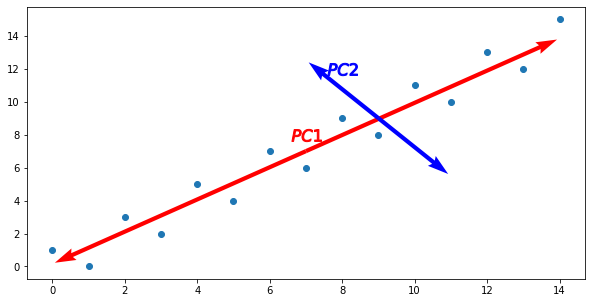

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [i+1 if i%2==0 else i-1 for i in range(15)])

plt.quiver(7, 7, 9, 4, color='r', scale=20)
plt.quiver(7, 7, -9, -4, color='r', scale=20)
plt.plot(7, 8, marker='$PC1$', ms=30, color='r')

plt.quiver(9, 9, -5, 4, color='b', scale=40)
plt.quiver(9, 9, 5, -4, color='b', scale=40)
plt.plot(8, 12, marker='$PC2$', ms=30, color='b');

Se rota y se proyecta, resultando:

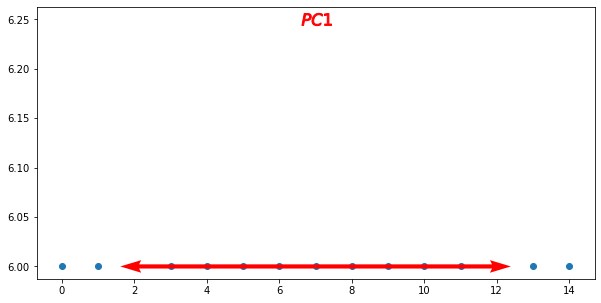

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [6 for i in range(15)])

plt.quiver(7, 6, 7, 0, color='r', scale=20)
plt.quiver(7, 6, -7, 0, color='r', scale=20)
plt.plot(7, 6.25, marker='$PC1$', ms=30, color='r');

**Combinacion lineal**

$v1>$ vector 1

$v2>$ vector 2

comb lineal = 2·$v1$ - 4·$v2$

**Combinacion no lineal**

comb no lineal = 2·$v1$·$v2$

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler # normalizadores

from sklearn.decomposition import PCA

import warnings
warnings.simplefilter('ignore')

In [5]:
data=pd.read_csv('data/pulsar_stars.csv')

data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data=data.drop('target_class', axis=1)

data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


#### normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la **estandarización**  ($N(\mu, \sigma)$):

$$\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [7]:
data_n_mano=(data - np.mean(data))/np.std(data)

data_n=StandardScaler().fit_transform(data)

np.sum(data_n_mano - data_n)

 Mean of the integrated profile                  0.0
 Standard deviation of the integrated profile    0.0
 Excess kurtosis of the integrated profile       0.0
 Skewness of the integrated profile              0.0
 Mean of the DM-SNR curve                        0.0
 Standard deviation of the DM-SNR curve          0.0
 Excess kurtosis of the DM-SNR curve             0.0
 Skewness of the DM-SNR curve                    0.0
dtype: float64

Ahora el **MinMax** :

$$\frac{x-min}{max-min}$$

In [8]:
data_mm_mano=(data - np.min(data))/(np.max(data) - np.min(data))

data_mm=MinMaxScaler().fit_transform(data)

np.sum(data_mm_mano - data_mm)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.547781e-14
 Excess kurtosis of the integrated profile       1.874941e-13
 Skewness of the integrated profile              6.680697e-14
 Mean of the DM-SNR curve                       -4.945127e-15
 Standard deviation of the DM-SNR curve          1.535528e-13
 Excess kurtosis of the DM-SNR curve            -3.709463e-13
 Skewness of the DM-SNR curve                   -3.247218e-14
dtype: float64

Se usa la standarización:

In [9]:
data=StandardScaler().fit_transform(data)

data=pd.DataFrame(data)

data.head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


Se aplica **PCA**

In [10]:
pca=PCA()

pca.fit(data)

PCA()

In [11]:
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

In [12]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

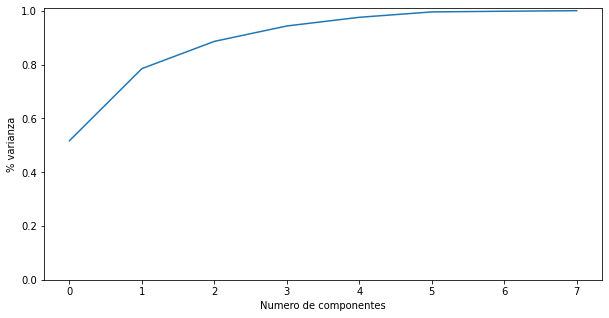

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

In [14]:
pca=PCA(n_components=4)

df=pd.DataFrame((pca.fit_transform(data)))

df.head()

,0,1,2,3
0,-1.278849,-1.273133,0.016213,0.662102
1,-1.020553,-0.201162,0.670478,1.605779
2,0.188289,0.432114,-0.979766,-0.519232
3,-1.015466,-1.469881,-0.018832,0.938386
4,-0.822626,2.123651,0.407953,-0.380922


In [15]:
pd.DataFrame(data).head()  # datos originales

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [16]:
pd.DataFrame(pca.inverse_transform(df)).head()   # proceso inverso de pca

,0,1,2,3,4,5,6,7
0,0.726963,1.327427,-0.735075,-0.783587,-0.337221,-0.257022,-0.070554,-0.255592
1,-0.038332,1.811110,0.059444,-0.129622,-0.454226,-0.587282,0.417421,0.287539
2,-0.059363,-1.046436,-0.031402,0.033576,-0.428290,-0.159977,-0.140189,-0.349821
3,0.623153,1.549935,-0.607552,-0.691777,-0.309245,-0.172273,-0.269003,-0.486495
4,-0.366730,-0.849173,0.255278,0.285361,-0.451494,-0.797759,1.303397,1.398872


### ICA (análisis de componente independiente)

Es la generalización de PCA. También es una transformación lineal, pero no requiere que los datos sigan una distribución Normal.


### Ejemplo
##### Problema de la fiesta:
Se intentan separar la voces de una grabación de audio...

In [17]:
from scipy import signal

from sklearn.decomposition import FastICA

In [18]:
time=np.linspace(0, 8, 2000)  # tiempo


s1=np.sin(2*time)  # señal seno

s2=np.sign(np.sin(3*time))  # señal onda cuadrada

s3=signal.sawtooth(2*np.pi*time)  # señal dientes de sierra

In [19]:
S=np.c_[s1, s2, s3]  # concatenar señales

S+=0.1*np.random.normal(size=S.shape)  # ruido

S/=S.std(axis=0)  # normalizacion

In [20]:
A=np.array([[1,1,1], [0.5, 2, 1], [1.5, 1, 2]])  # operador de mezcla de señal

X=np.dot(S, A.T)  # observaciones

In [21]:
ica=FastICA(n_components=3)

S_ica=ica.fit_transform(X)  # señal extraida por ica

A_ica=ica.mixing_ # operador de mezcla señal 

In [22]:
pca=PCA(n_components=3)  # pca para comparar

S_pca=pca.fit_transform(X)

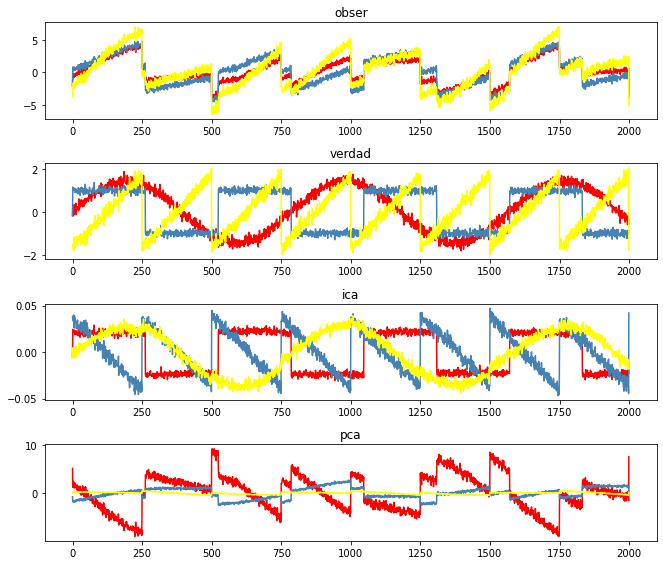

In [23]:
plt.figure(figsize=(10, 8))

nombres=['obser', 'verdad', 'ica', 'pca']

modelos=[X, S, S_ica, S_pca]

colores=['red', 'steelblue', 'yellow']

for i , (m,n) in enumerate(zip(modelos, nombres), 1):
    plt.subplot(4, 1, i)
    plt.title(n)
    
    for sig, c in zip(m.T, colores):
        plt.plot(sig, color=c)
        
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)

plt.show();

### UMAP (uniform manifold aprox and projection)

Tiene dos pasos:

+ KNN con pesos, según topología (grafo)
+ Se reduce la dimensión basándose en esa topología

https://umap-learn.readthedocs.io/en/latest/

In [24]:
!pip install umap-learn

In [25]:
import umap

import seaborn as sns

from sklearn.datasets import load_iris

In [26]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [27]:
load_iris().DESCR[:100].split('\n')

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Num']

In [28]:
load_iris().data.shape

(150, 4)

In [29]:
load_iris().target.shape

(150,)

In [30]:
redu=umap.UMAP(n_components=2).fit_transform(load_iris().data)

redu.shape

(150, 2)

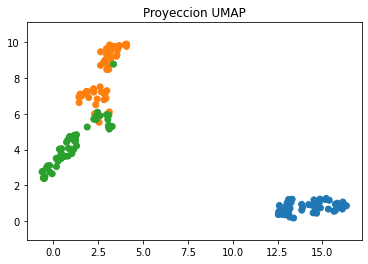

In [31]:
plt.scatter(redu[:, 0], redu[:, 1], 
            c=[sns.color_palette()[x] for x in load_iris().target])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

### t-SNE

**t-Distributed Stochastic Neighbor Embbeding**

Convierte similitudes entre los datos en probabilidad conjunta y trata de minimizar la divergencia _Kullback-Leibler_ (entropía relativa):

$$D_{KL}(P|Q)=\sum P(x)log(\frac{P(x)}{Q(x)})$$

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

In [32]:
from sklearn.manifold import TSNE

In [33]:
tsne=TSNE(n_components=2, perplexity=50)

emb=tsne.fit_transform(load_iris().data)

tsne_df=pd.DataFrame(emb, columns=['e1', 'e2'])

tsne_df.head()

,e1,e2
0,-5.426535,-10.761235
1,-5.739322,-11.484012
2,-5.107604,-11.492869
3,-5.247266,-11.644090
4,-4.961041,-10.783570


In [34]:
tsne_df.shape

(150, 2)

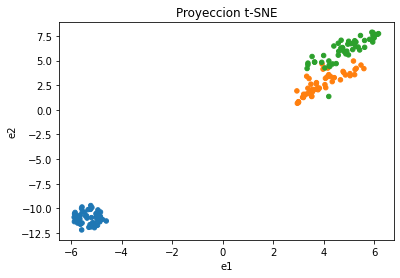

In [35]:
tsne_df.plot.scatter(x='e1', y='e2', 
                     c=[sns.color_palette()[x] for x in load_iris().target])

plt.title('Proyeccion t-SNE');

In [36]:
tsne_df[tsne_df.e1>4].head()

,e1,e2
50,5.582684,4.182798
51,4.853869,3.540918
52,5.468237,4.543795
54,4.783920,3.788675
56,4.758725,3.899041


In [37]:
data_iris=pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

data_iris['target']=load_iris().target

data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
